Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.86      0.80      0.83        15

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.83      0.83      0.83        30



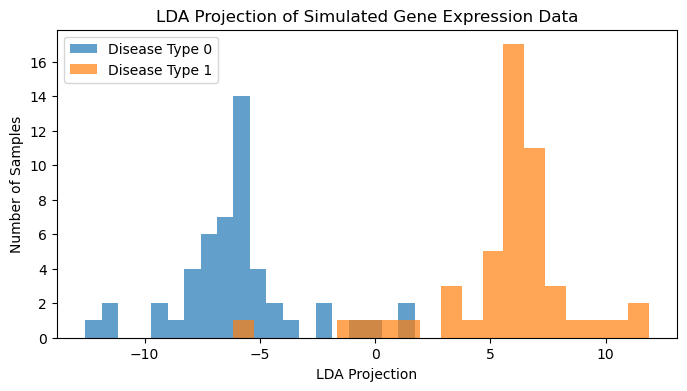

In [1]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Simulate gene expression data
np.random.seed(42)
n_samples = 100  # number of patients
n_genes = 50    # number of genes (features)

# Simulate two disease types (0 and 1)
X_class0 = np.random.normal(loc=0.0, scale=1.0, size=(n_samples//2, n_genes))
X_class1 = np.random.normal(loc=1.0, scale=1.0, size=(n_samples//2, n_genes))
X = np.vstack([X_class0, X_class1])
y = np.array([0]*(n_samples//2) + [1]*(n_samples//2))

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict and evaluate
y_pred = lda.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Project data onto the LDA axis for visualization
X_lda = lda.transform(X)
plt.figure(figsize=(8, 4))
plt.hist(X_lda[y==0], bins=20, alpha=0.7, label='Disease Type 0')
plt.hist(X_lda[y==1], bins=20, alpha=0.7, label='Disease Type 1')
plt.xlabel('LDA Projection')
plt.ylabel('Number of Samples')
plt.title('LDA Projection of Simulated Gene Expression Data')
plt.legend()
plt.show()